<a href="https://colab.research.google.com/github/ptejaswi528/API/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADA BOOSTING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive

# Mount your Drive
drive.mount('/content/drive')

# Once mounted, navigate to the folder
# Example path (adjust based on your structure)
path = '/content/drive/My Drive/Social_Network_Ads.csv'

dataset = pd.read_csv(path)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = dataset.iloc[:, [2, 3]].values # Age, EstimatedSalary
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42

)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
base_model = DecisionTreeClassifier(max_depth=1)

classifier = AdaBoostClassifier(
estimator=base_model,
n_estimators=50,
learning_rate=1.0,
random_state=42)

In [ ]:
base_model = DecisionTreeClassifier(max_depth=1)

classifier = AdaBoostClassifier(
estimator=base_model,
n_estimators=50,
learning_rate=1.0,
random_state=42
)
classifier.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
y_pred=classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8875


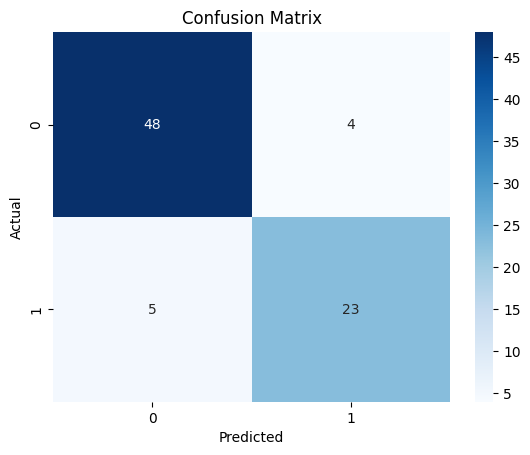

In [ ]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

GRADIENT BOOSTING


In [ ]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=42)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.93


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]])

XG BOOSTING


In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=0.8,colsample_bytree=0.8,random_state=42,use_label_encoder=False,eval_metric='logloss')

classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.93


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:20:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from google.colab import drive

# Mount your Drive
drive.mount('/content/drive')

# Once mounted, navigate to the folder
# Example path (adjust based on your structure)
path = '/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

dataset = pd.read_csv(path)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




A subscription-based digital service company is facing customer churn, where users cancel their subscriptions after a few months.
Key challenges:
Customer behavior patterns are complex and non-linear
Some customers leave suddenly despite appearing loyal
A single model fails to capture small but important signals
Business wants a high-performance and scalable solution
The company already tried:
Logistic Regression
Decision Tree
Random Forest
…but results are not satisfactory.

Tasks:
Load the dataset and study customer attributes such as:
Tenure
Monthly charges
Contract type
Payment method
Identify the target variable and

explain its business meaning.

Build a baseline classification model using a tree-based approach.
Evaluate its performance using:
Accuracy
Confusion Matrix
Recall for churn customers

Focused customer retention programs

Build an ensemble model that improves predictions iteratively.
Train the model using historical customer data.
Observe how the model:
Focuses more on previously misclassified customers
Learns complex patterns gradually

Evaluate the model using:
Accuracy
Precision
Recall
F1-Score
Compare the results with the baseline model.

Analyze the following:
How many churn customers were correctly identified?
How many loyal customers were wrongly flagged?
Answer:
Is it better to wrongly flag a loyal customer?
Or miss a churn customer?
Which metric should the business prioritize and why?

Identify which customer features contribute most to churn prediction.
Explain how understanding feature importance helps business teams.


In [ ]:
telco_df = dataset.copy()

print("First 5 rows of the dataset:")
print(telco_df.head())

print("\nConcise summary of the DataFrame:")
telco_df.info()

print("\nDescriptive statistics of the numerical columns:")
print(telco_df.describe())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [ ]:
telco_df['Churn'] = telco_df['Churn'].map({'No': 0, 'Yes': 1})
print("Converted 'Churn' column to numerical:")
print(telco_df['Churn'].value_counts())

Converted 'Churn' column to numerical:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':")
    print(telco_df[col].value_counts())


Unique values and counts for 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values and counts for 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values and counts for 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values and counts for 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values and counts for 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values and counts for 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values and counts for 'OnlineSecurity':
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values and counts for 'OnlineBackup':
OnlineBackup
No                     3088
Yes        

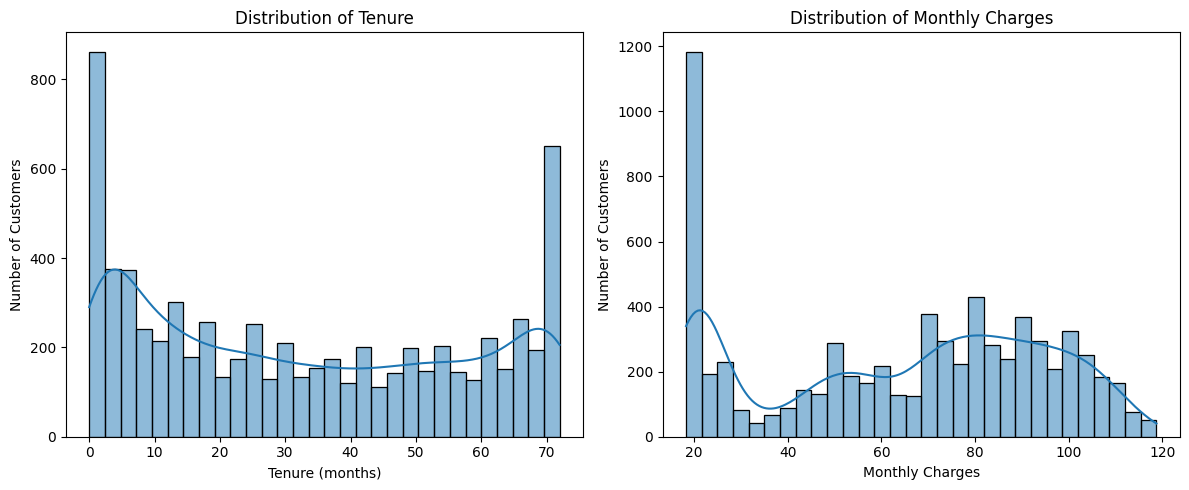

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(telco_df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
sns.histplot(telco_df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


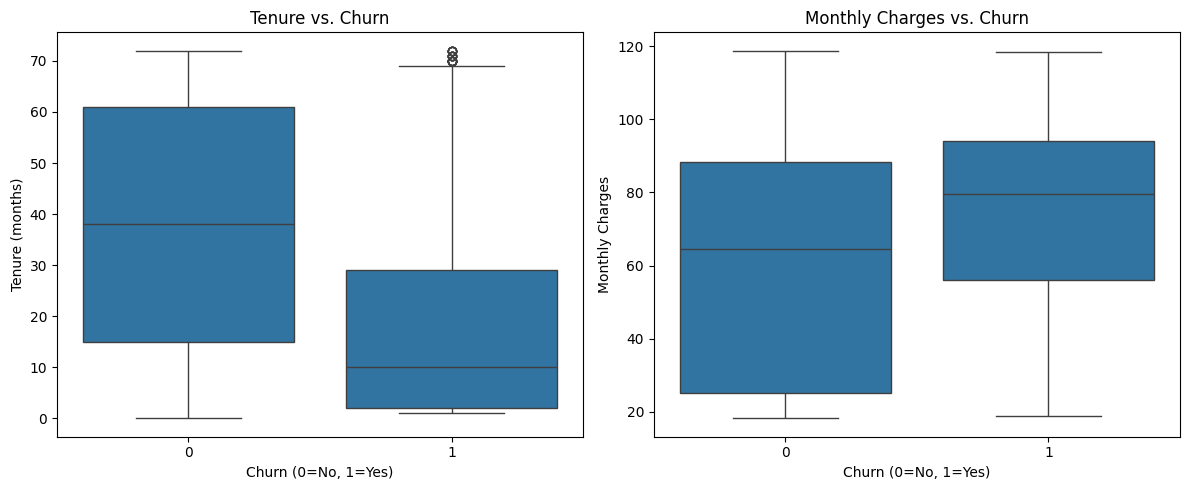

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=telco_df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Tenure (months)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_df)
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

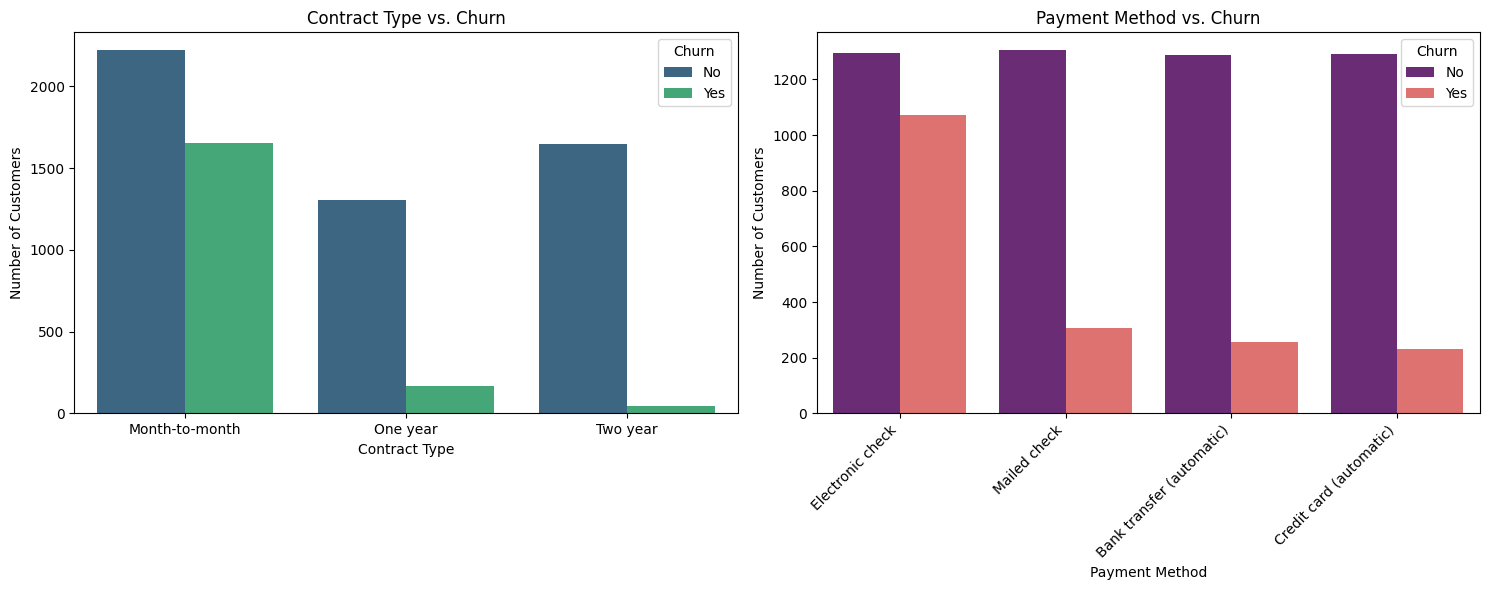

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=telco_df, palette='viridis')
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=telco_df, palette='magma')
plt.title('Payment Method vs. Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [ ]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(' ', np.nan)
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['TotalCharges'] = telco_df['TotalCharges'].fillna(0)

print("Data type of 'TotalCharges' after conversion:")
print(telco_df['TotalCharges'].dtype)
print("Number of missing values in 'TotalCharges':")
print(telco_df['TotalCharges'].isnull().sum())

Data type of 'TotalCharges' after conversion:
float64
Number of missing values in 'TotalCharges':
0


In [ ]:
telco_df = telco_df.drop('customerID', axis=1)
print("Dropped 'customerID' column. Current columns:")
print(telco_df.columns)

Dropped 'customerID' column. Current columns:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
categorical_cols = telco_df.select_dtypes(include='object').columns.tolist()
# 'Churn' is already numerical (0/1), so we don't include it in categorical_cols for one-hot encoding
# 'customerID' has already been dropped

telco_df = pd.get_dummies(telco_df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding of categorical features:")
print(telco_df.head())

DataFrame after one-hot encoding of categorical features:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1         

In [ ]:
X = telco_df.drop('Churn', axis=1)
y = telco_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5282, 30)
Shape of X_test: (1761, 30)
Shape of y_train: (5282,)
Shape of y_test: (1761,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("First 5 rows of scaled X_train:\n", X_train_scaled[:5])

Shape of scaled X_train: (5282, 30)
Shape of scaled X_test: (1761, 30)
First 5 rows of scaled X_train:
 [[-0.43609145 -1.28288214 -1.31004561 -0.99706554  0.97309929 -0.96941854
   1.5265618  -3.06222308  3.06222308 -0.86511714 -0.8826382  -0.52696978
  -0.52696978 -0.63241362 -0.52696978 -0.7323649  -0.52696978 -0.71747414
  -0.52696978 -0.63593531 -0.52696978 -0.79388092 -0.52696978 -0.7980065
  -0.52051281 -0.56058655  0.83766059 -0.52344917  1.40621907 -0.54453143]
 [-0.43609145 -1.03785653  0.34483164 -0.77679441 -1.02764436 -0.96941854
  -0.65506683  0.32656014 -0.32656014 -0.86511714  1.13296706 -0.52696978
  -0.52696978 -0.63241362 -0.52696978 -0.7323649  -0.52696978  1.39377846
  -0.52696978 -0.63593531 -0.52696978 -0.79388092 -0.52696978 -0.7980065
  -0.52051281 -0.56058655  0.83766059 -0.52344917  1.40621907 -0.54453143]
 [-0.43609145 -1.16036933 -1.48433058 -0.97052898 -1.02764436 -0.96941854
   1.5265618   0.32656014 -0.32656014 -0.86511714 -0.8826382   1.89764204
   1.897

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

# Instantiate Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

print("Decision Tree Classifier trained and predictions made.")

Decision Tree Classifier trained and predictions made.


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:", cm_dt)

# Recall for churn customers (positive class, 1)
recall_dt = recall_score(y_test, y_pred_dt, pos_label=1)
print("Recall Score for Churn Customers:", recall_dt)

Accuracy Score: 0.7189097103918228
Confusion Matrix: [[1042  240]
 [ 255  224]]
Recall Score for Churn Customers: 0.46764091858037576


In [ ]:
from xgboost import XGBClassifier

# Instantiate XGBoost Classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train the model
xgb_classifier.fit(X_train_scaled, y_train)

print("XGBoost Classifier trained successfully.")

XGBoost Classifier trained successfully.


In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
print("Predictions made using XGBoost Classifier.")

Predictions made using XGBoost Classifier.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1-Score: {f1_xgb:.4f}")
print("XGBoost Confusion Matrix:")
print(cm_xgb)

XGBoost Accuracy: 0.8035
XGBoost Precision: 0.6802
XGBoost Recall: 0.5240
XGBoost F1-Score: 0.5920
XGBoost Confusion Matrix:
[[1164  118]
 [ 228  251]]


In [ ]:
print("\n--- Model Comparison ---")
print("Baseline Decision Tree:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"  Recall (Churn): {recall_dt:.4f}")
print(f"  Confusion Matrix:\n{cm_dt}")

print("\nXGBoost Classifier:")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall (Churn): {recall_xgb:.4f}")
print(f"  F1-Score: {f1_xgb:.4f}")
print(f"  Confusion Matrix:\n{cm_xgb}")


--- Model Comparison ---
Baseline Decision Tree:
  Accuracy: 0.7189
  Recall (Churn): 0.4676
  Confusion Matrix:
[[1042  240]
 [ 255  224]]

XGBoost Classifier:
  Accuracy: 0.8035
  Precision: 0.6802
  Recall (Churn): 0.5240
  F1-Score: 0.5920
  Confusion Matrix:
[[1164  118]
 [ 228  251]]


Top 10 Feature Importances from XGBoost Classifier:

InternetService_Fiber optic           0.157464
Contract_Two year                     0.141511
Contract_One year                     0.119788
OnlineSecurity_No internet service    0.090715
InternetService_No                    0.085321
PaymentMethod_Electronic check        0.069390
tenure                                0.062225
PaperlessBilling_Yes                  0.031428
StreamingMovies_Yes                   0.030370
OnlineSecurity_Yes                    0.029535
dtype: float32


/tmp/ipython-input-3427839198.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance_series.head(10).values, y=sorted_importance_series.head(10).index, palette='viridis')


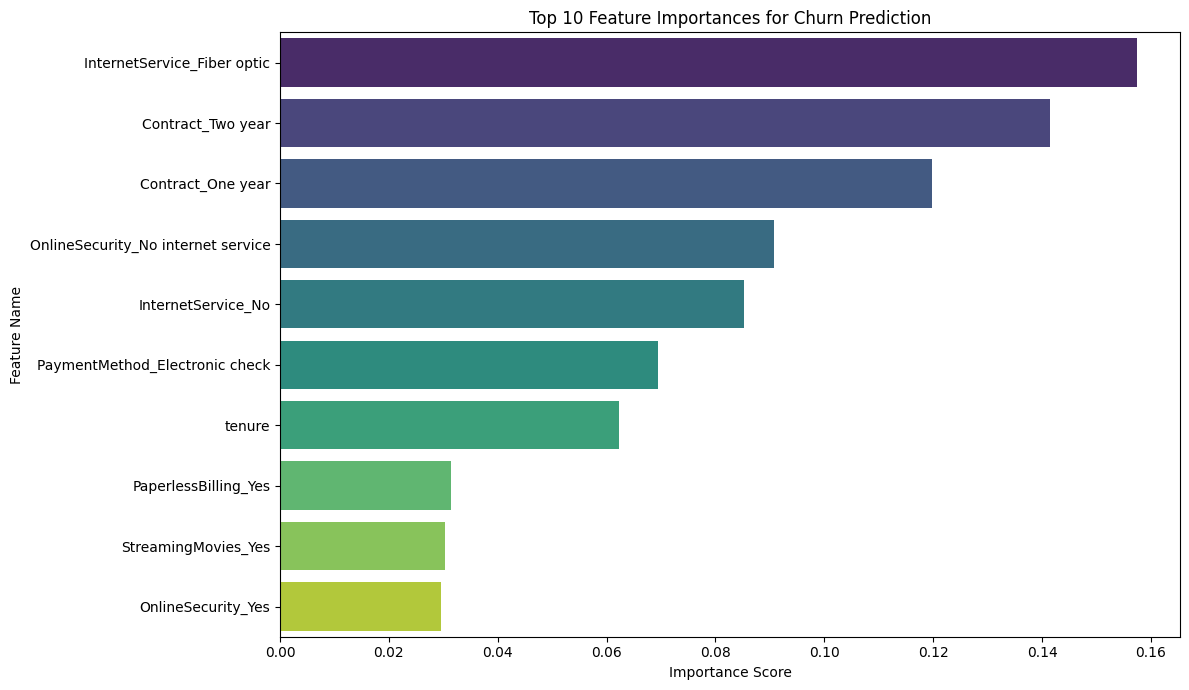

In [ ]:
feature_importances = xgb_classifier.feature_importances_
feature_names = X.columns

# Create a pandas Series for better visualization and sorting
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_importance_series = importance_series.sort_values(ascending=False)

print("Top 10 Feature Importances from XGBoost Classifier:\n")
print(sorted_importance_series.head(10))

# Plotting feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x=sorted_importance_series.head(10).values, y=sorted_importance_series.head(10).index, palette='viridis')
plt.title('Top 10 Feature Importances for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()